In [50]:
import matplotlib.pyplot as plt
import numpy as np 

## Problem 1

In [51]:
cutoff = np.array([10,20,30,40,50,60,70,80,90,100])*13.6 
energies = np.array([-112.89377333,-129.76845473,-136.87815836,-139.69609171,-140.59800097,-140.81896764,-140.85561354,-140.85877956,-140.85885697,-140.85888089])*13.6/2 #two atoms/cell

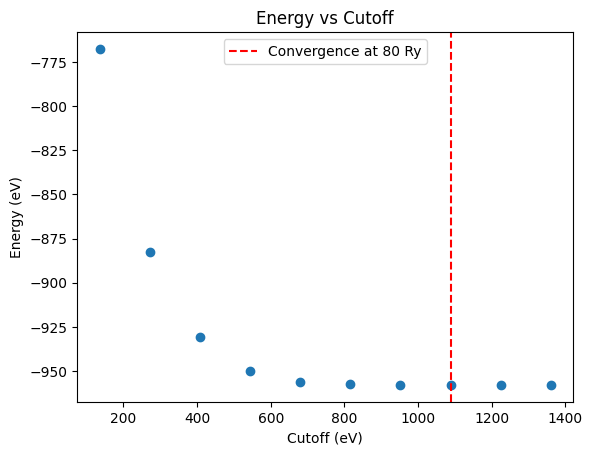

In [22]:
plt.figure()
plt.plot(cutoff,energies,'o')
plt.xlabel("Cutoff (eV)")
plt.ylabel("Energy (eV)")
plt.axvline(cutoff[7],linestyle='--',color='red', label = "Convergence at 80 Ry")
plt.title("Energy vs Cutoff")
plt.legend(loc = 'best')
plt.savefig("energy_vs_cutoff.png",dpi=300)

In [52]:
threshold = 0.01
convergence = []
for cut,energy in zip(cutoff,energies):
    diff = energy - energies[-1]
    convergence.append(diff)
    if diff < threshold:
        print("Converged at cutoff = {} Ry".format(cut/13.6))

Converged at cutoff = 80.0 Ry
Converged at cutoff = 90.0 Ry
Converged at cutoff = 100.0 Ry


## Problem 2

In [53]:
forces = np.array([0.08657784,0.04960322,0.04355870,0.04197649,0.04145832,0.04138646,0.04148643,0.04144387,0.04151060,0.04151179])*25.71 #25.71 eV/Angstrom

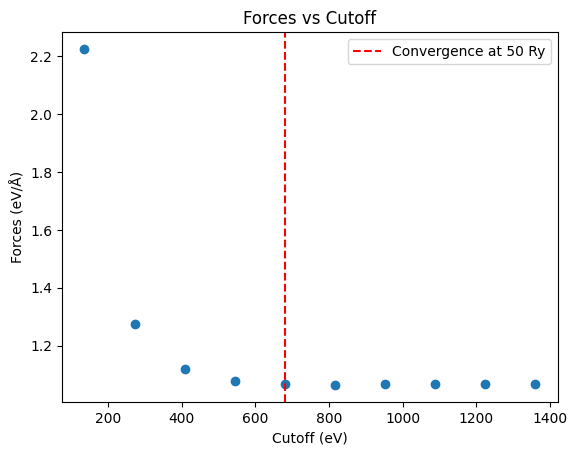

In [32]:
plt.figure()
plt.plot(cutoff,forces,'o')
plt.xlabel("Cutoff (eV)")
plt.ylabel("Forces (eV/\u212B)")
plt.axvline(cutoff[4],linestyle='--',color='red', label = "Convergence at 50 Ry")
plt.title("Forces vs Cutoff")
plt.legend(loc = 'best')
plt.savefig("forces_vs_cutoff.png",dpi=300)

In [55]:
threshold_2 = 0.01
convergence_2 = []
for cut,force in zip(cutoff,forces):
    diff = np.abs(force - forces[-1])
    convergence_2.append(diff)
    if diff < threshold_2:
        print("Converged at cutoff = {} Ry".format(cut/13.6))

Converged at cutoff = 50.0 Ry
Converged at cutoff = 60.0 Ry
Converged at cutoff = 70.0 Ry
Converged at cutoff = 80.0 Ry
Converged at cutoff = 90.0 Ry
Converged at cutoff = 100.0 Ry


## Problem 3

In [56]:
mesh = np.array([2,4,6,8,10])
energies_2 = np.array([-140.75527042,-140.85877956,-140.86238601,-140.86260586,-140.86262335])*13.6/2 #two atoms/cell

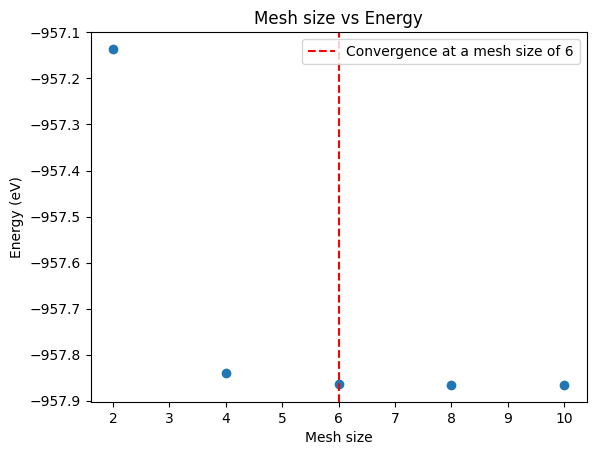

In [36]:
plt.figure()
plt.plot(mesh,energies_2,'o')
plt.xlabel("Mesh size")
plt.ylabel("Energy (eV)")
plt.axvline(mesh[2],linestyle='--',color='red', label = "Convergence at a mesh size of 6")
plt.title("Mesh size vs Energy")
plt.legend(loc = 'best')
plt.savefig("mesh_vs_energy.png",dpi=300)

In [57]:
threshold_3 = 0.01
convergence_3 = []
for mesh_size,energy in zip(mesh,energies_2):
    diff = np.abs(energy - energies_2[-1])
    convergence_3.append(diff)
    if diff < threshold_3:
        print("Converged at mesh size = {}".format(mesh_size))

Converged at mesh size = 6
Converged at mesh size = 8
Converged at mesh size = 10


In [38]:
from scipy.optimize import curve_fit

In [39]:
def f(x,a,b):
    return a*x+b

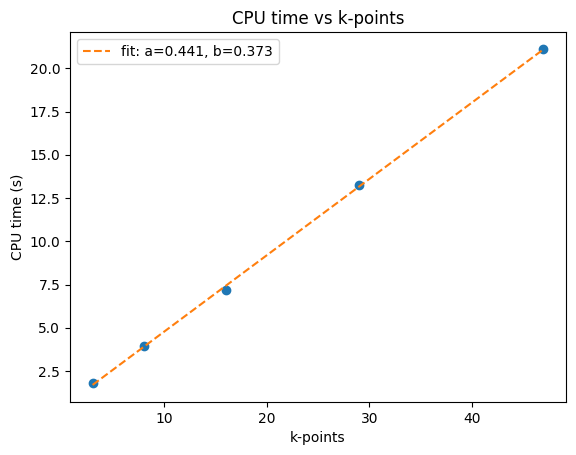

In [43]:
cpu_time = np.array([1.81,3.94,7.17,13.24,21.12])
k_points = np.array([3,8,16,29,47])

popt, pcov = curve_fit(f, k_points, cpu_time)

plt.figure()
plt.plot(k_points,cpu_time,'o')
plt.plot(k_points,f(k_points,*popt),'--',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel("k-points")
plt.ylabel("CPU time (s)")
plt.legend(loc = 'best')
plt.title("CPU time vs k-points")
plt.savefig("cpu_time_vs_k_points.png",dpi=300)


## Problem 4

In [58]:
forces_2 = np.array([0.03438405, 0.04144387, 0.04191217, 0.04195415,0.04195870])*25.71 #25.71 eV/Angstrom

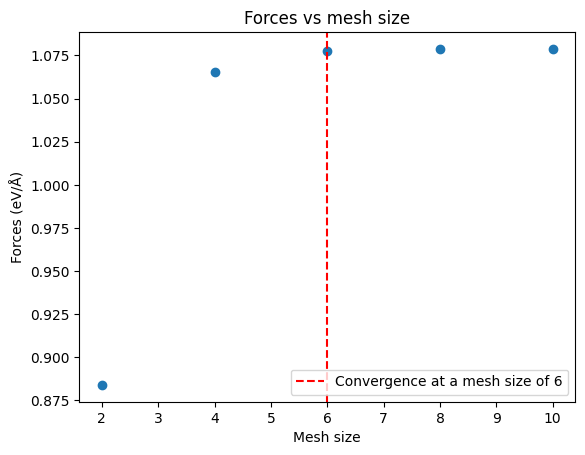

In [65]:
plt.figure()
plt.plot(mesh,forces_2,'o')
plt.xlabel("Mesh size")
plt.ylabel("Forces (eV/\u212B)")
plt.axvline(mesh[2],linestyle='--',color='red', label = "Convergence at a mesh size of 6")
plt.title("Forces vs mesh size")
plt.legend(loc = 'best')
plt.savefig("forces_vs_mesh.png",dpi=300)

In [60]:
threshold_4 = 0.01
convergence_4 = []
for mesh_size,force in zip(mesh,forces_2):
    diff = np.abs(force - forces_2[-1])
    convergence_4.append(diff)
    if diff < threshold_4:
        print("Converged at mesh size = {}".format(mesh_size))

Converged at mesh size = 6
Converged at mesh size = 8
Converged at mesh size = 10


## Problem 5

In [77]:
lat_exp = np.array([-113.10939793,-129.79559677,-136.91578629,-139.69201344,-140.60217477,-140.82191098,-140.85808627,-140.86123195,-140.86131667,-140.86133978])
lat_new = np.array([-113.03181247,-129.84383577,-136.91921014,-139.68443090,-140.59966365,-140.82318972,-140.85905760,-140.86222468,-140.86230139,-140.86232515])

energy_diff = np.abs(lat_exp - lat_new)*13.6/2
print(energy_diff)

[0.52758113 0.3280252  0.02328218 0.05156127 0.01707562 0.00869543
 0.00660504 0.00675056 0.0066961  0.00670052]


In [78]:
threshold_5 = 0.01
convergence_5 = []
for cut,energy in zip(cutoff,energy_diff):
    diff = np.abs(energy - energy_diff[-1])
    convergence_5.append(diff)
    if diff < threshold_5:
        print("Converged at cutoff = {} Ry".format(cut/13.6))

Converged at cutoff = 60.0 Ry
Converged at cutoff = 70.0 Ry
Converged at cutoff = 80.0 Ry
Converged at cutoff = 90.0 Ry
Converged at cutoff = 100.0 Ry


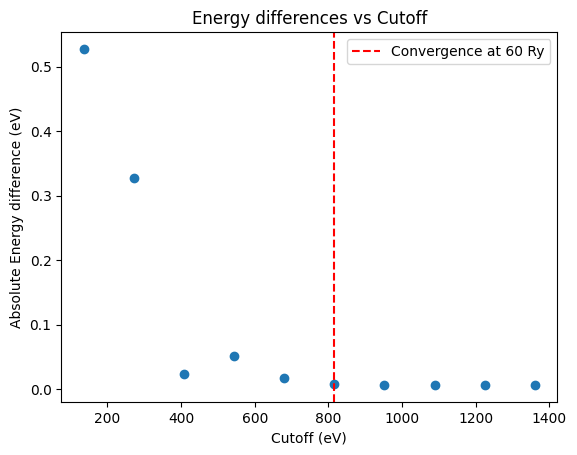

In [79]:
plt.figure()
plt.plot(cutoff,energy_diff,'o')
plt.xlabel("Cutoff (eV)")
plt.ylabel("Absolute Energy difference (eV)")
plt.axvline(cutoff[5],linestyle='--',color='red', label = "Convergence at 60 Ry")
plt.title("Energy differences vs Cutoff")
plt.legend(loc = 'best')
plt.savefig("energy_diff_vs_cutoff.png",dpi=300)

## Problem 7

In [164]:
lat_energies = np.array([-140.86250154,-140.86256221,-140.86261050,-140.86264674,-140.86267101,-140.86268345,-140.86268408,-140.86267313,-140.86265055,-140.86261658,-140.86257131,-140.86251486,-140.86244730,-140.86236869,-140.86227917,-140.86217897,-140.86206805,-140.86194641,-140.86181439,-140.86167187,-140.86151911,-140.86135622,-140.86118317,-140.86100015,-140.86080729,-140.86060443,-140.86039196,-140.86016995,-140.85993829,-140.85969723,-140.85944680])*13.6
lat_param = np.linspace(9.74,10.04,31)*0.529
lat_volumes = lat_param**3/4
print(len(lat_energies))


31


In [165]:
min_energy = np.min(lat_energies)
print(min_energy,np.argmin(lat_energies), lat_energies)

-1915.732503488 6 [-1915.73002094 -1915.73084606 -1915.7315028  -1915.73199566
 -1915.73232574 -1915.73249492 -1915.73250349 -1915.73235457
 -1915.73204748 -1915.73158549 -1915.73096982 -1915.7302021
 -1915.72928328 -1915.72821418 -1915.72699671 -1915.72563399
 -1915.72412548 -1915.72247118 -1915.7206757  -1915.71873743
 -1915.7166599  -1915.71444459 -1915.71209111 -1915.70960204
 -1915.70697914 -1915.70422025 -1915.70133066 -1915.69831132
 -1915.69516074 -1915.69188233 -1915.68847648]


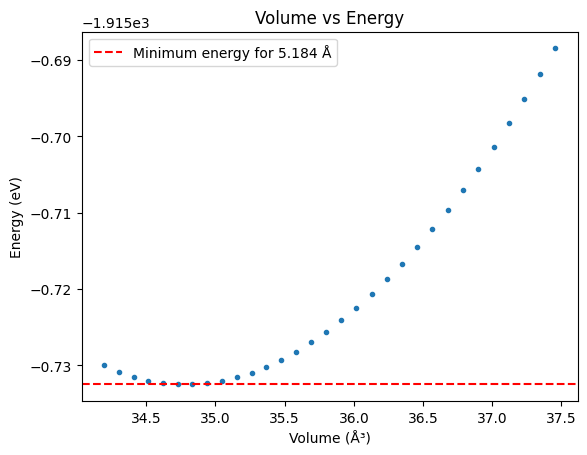

In [166]:
plt.figure()
plt.plot(lat_volumes,lat_energies,'.')
plt.axhline(min_energy,linestyle='--',color='red', label = "Minimum energy for {:.3f} \u212B".format(lat_param[np.argmin(lat_energies)]))
plt.xlabel("Volume (\u212B\u00B3)")
plt.ylabel("Energy (eV)")
plt.title("Volume vs Energy")
plt.legend(loc = 'best')
plt.savefig("volume_vs_energy.png",dpi=300)

## Problem 8

### Part A - Bulk modulus simple

0.10510266373275766 34.832548609922014 3.2581825757154874
79.56399482594551
77.7005542132885


Text(0.5, 1.0, 'Volume vs Bulk modulus')

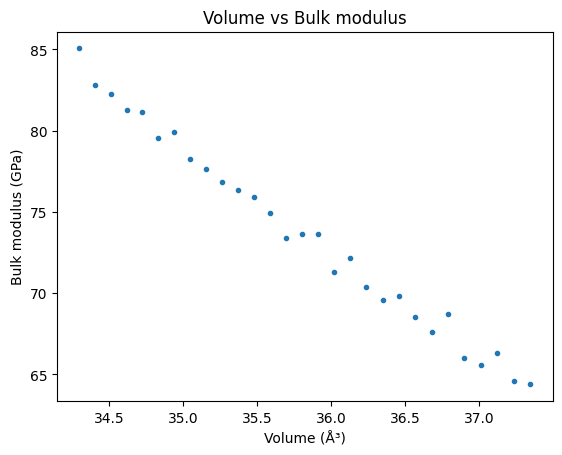

In [167]:
step = np.abs(lat_volumes[-1]-lat_volumes[0])/len(lat_volumes)
V0 = lat_volumes[np.argmin(lat_energies)]
print(step, V0, step*len(lat_volumes))

B = []

for i in range(len(lat_energies)-1):
    B.append(V0*(lat_energies[i+1]-2*lat_energies[i]+lat_energies[i-1])/(step**2))
B = np.asarray(B)
B = B*(1.60218e-19/1e-30)/1e9
print(B[6])

B2=np.gradient(np.gradient(lat_energies,lat_volumes),lat_volumes)*(1.60218e-19/1e-30)/1e9*V0

print(B2[6])

plt.figure()
plt.plot(lat_volumes[1:-1],B[1:],'.')
plt.xlabel("Volume (\u212B\u00B3)")
plt.ylabel("Bulk modulus (GPa)")
plt.title("Volume vs Bulk modulus")

### Part B - Birch-Murnaghan EOS

Let's try to do it with this one.

In [168]:
from scipy.optimize import leastsq
import pylab

Birch-Murnaghan : E0 = -1915.732514 eV
Birch-Murnaghan : B0 = 77.785402 GPa
Birch-Murnaghan : Bp = 0.349560
Birch-Murnaghan : V0 = 34.785511 angstrom^3



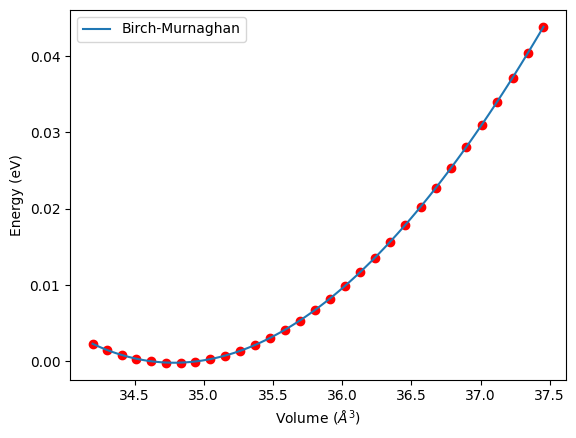

In [169]:
def f(params,vol):
    E0,B0,Bp,V0 = params
    eta = (vol/V0)**(1.0/3.0)
    E = E0 + 9.0*B0*V0/16.0 * (eta**2-1.0)**2 * (6.0 + Bp*(eta**2-1.0) - 4.0*eta**2)
    return E

vol = lat_volumes
ene = lat_energies

# fit a parabola to the data and get inital
#  guess for equilibirum volume
# and bulk modulus
a, b, c = np.polyfit(vol, ene, 2)
V0 = -b/(2*a)
E0 = a*V0**2 + b*V0 + c
B0 = 2*a*V0
Bp = 4.0

# initial guesses in the same order used 
# in the Murnaghan function
x0 = [E0, B0, Bp, V0]

def print_params(label, params):
    E0, B0, Bp, V0 = params
    print(label, ": E0 = %f eV" % (E0))
    print(label, ": B0 = %f GPa" % (B0*160.21765))
    print(label, ": Bp = %f" % (Bp))
    print(label, ": V0 = %f angstrom^3" % (V0))
    print()

target = lambda params, y, x: y - f(params, x)
birch_murn, ier = leastsq(target, x0, args=(ene,vol))
print_params("Birch-Murnaghan", birch_murn)

vfit = np.linspace(min(vol),max(vol),100)

pylab.plot(vol, ene-E0, 'ro')
pylab.plot(vfit, f(birch_murn,vfit)-E0, label='Birch-Murnaghan')
pylab.xlabel('Volume ($\AA^3$)')
pylab.ylabel('Energy (eV)')
pylab.legend(loc='best')
pylab.show()

Let's try again.

Birch-Murnaghan : E0 = -1916.535945 eV
Birch-Murnaghan : B0 = 78.292517 GPa
Birch-Murnaghan : Bp = -0.115487
Birch-Murnaghan : V0 = 34.782748 angstrom^3



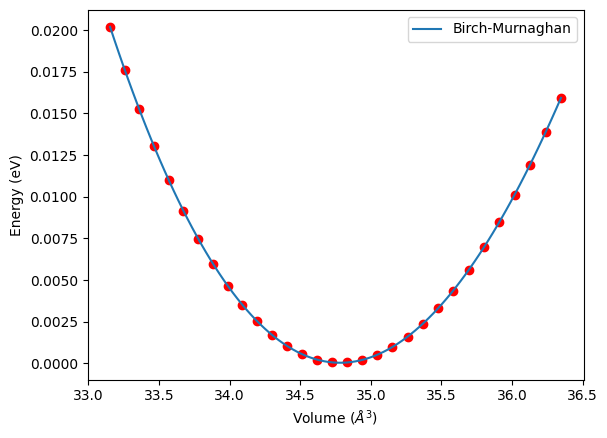

In [171]:
lat_energies_2 = np.array([-140.86126044,-140.86144925,-140.86162469,-140.86178685,-140.86193585,-140.86207186,-140.86219493,-140.86230522,-140.86240286,-140.86248796,-140.86255969,-140.86261997,-140.86266812,-140.86270420,-140.86272827,-140.86274047,-140.86274092,-140.86272973,-140.86270702,-140.86267290,-140.86262743,-140.86257080,-140.86250301,-140.86242423,-140.86233453,-140.86223409,-140.86212291,-140.86200121,-140.86186895,-140.86172633,-140.86157340])*13.605698066
lat_param_2 = np.linspace(9.64,9.94,31)*0.529
lat_volumes_2 = lat_param_2**3/4

vol = lat_volumes_2
ene = lat_energies_2

# fit a parabola to the data and get inital
#  guess for equilibirum volume
# and bulk modulus
a, b, c = np.polyfit(vol, ene, 2)
V0 = -b/(2*a)
E0 = a*V0**2 + b*V0 + c
B0 = 2*a*V0
Bp = 4.0

# initial guesses in the same order used 
# in the Murnaghan function
x0 = [E0, B0, Bp, V0]

target = lambda params, y, x: y - f(params, x)
birch_murn, ier = leastsq(target, x0, args=(ene,vol))
print_params("Birch-Murnaghan", birch_murn)

vfit = np.linspace(min(vol),max(vol),100)

pylab.plot(vol, ene-E0, 'ro')
pylab.plot(vfit, f(birch_murn,vfit)-E0, label='Birch-Murnaghan')
pylab.xlabel('Volume ($\AA^3$)')
pylab.ylabel('Energy (eV)')
pylab.legend(loc='best')
pylab.show()



## Problem 9

In [275]:
x = np.array([-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07])
a = 9.8
a2 = 9.8 + x
b2 = (a-x)/a2
c2 = (a+(x**2)/(1-x**2))/a2

V_ini = (941.192 * 0.529**3)*1e-30

total_en = np.array([-563.4505373405,-563.4506428126,-563.4507323935,-563.4508059108,-563.4508551891,-563.4509004460,-563.4509135790,-563.4509371013,-563.4509135790,-563.4509004460,-563.4508551891,-563.4508059108,-563.4507323935,-563.4506428126,-563.4505373405])
diff_en = (total_en - total_en[7])*13.605698066*1.60218e-19
print(diff_en)
print(V_ini)

[8.71429666e-22 6.41513384e-22 4.46237975e-22 2.85979250e-22
 1.78558581e-22 7.99040724e-23 5.12757380e-23 0.00000000e+00
 5.12757380e-23 7.99040724e-23 1.78558581e-22 2.85979250e-22
 4.46237975e-22 6.41513384e-22 8.71429666e-22]
1.3933019443968803e-28


In [276]:
def g(x,a):
    return a*x**2

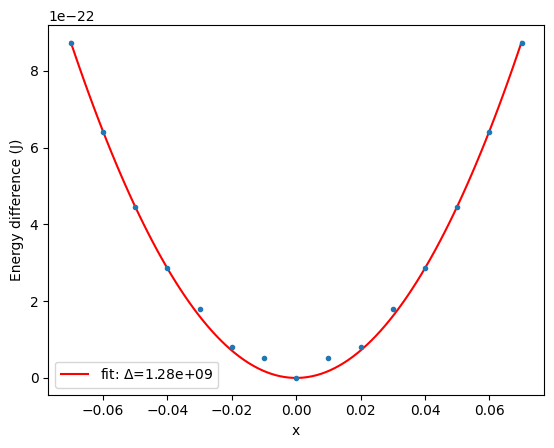

In [277]:
popt, pcov = curve_fit(g, x, diff_en)
xdata = np.linspace(-0.07,0.07,100)
plt.figure()
plt.plot(xdata,g(xdata,*popt),'r-',label='fit: $\Delta$=%.2e' % tuple(popt/V_ini))
plt.plot(x,diff_en,'.')
plt.xlabel('x')
plt.ylabel('Energy difference (J)')
plt.legend()
plt.savefig('c11_c12.png',dpi=300)

In [278]:
print(popt/V_ini)

[1.2817045e+09]


In [279]:
celldm1 = np.sqrt(a**2 + x**2/4)
celldm2 = 1
celldm3 = np.abs(a + x**2/(4-x**2))/celldm1
celldm4 = (a*x)/celldm1

print(celldm1)
print(celldm3)
print(celldm4)

[9.8000625  9.80004592 9.80003189 9.80002041 9.80001148 9.8000051
 9.80000128 9.8        9.80000128 9.8000051  9.80001148 9.80002041
 9.80003189 9.80004592 9.8000625 ]
[1.00011878 1.00008723 1.00006056 1.00003875 1.00002179 1.00000968
 1.00000242 1.         1.00000242 1.00000968 1.00002179 1.00003875
 1.00006056 1.00008723 1.00011878]
[-0.06999955 -0.05999972 -0.04999984 -0.03999992 -0.02999996 -0.01999999
 -0.01        0.          0.01        0.01999999  0.02999996  0.03999992
  0.04999984  0.05999972  0.06999955]


[1.0348162e+12]
1.3933019443968803e-28


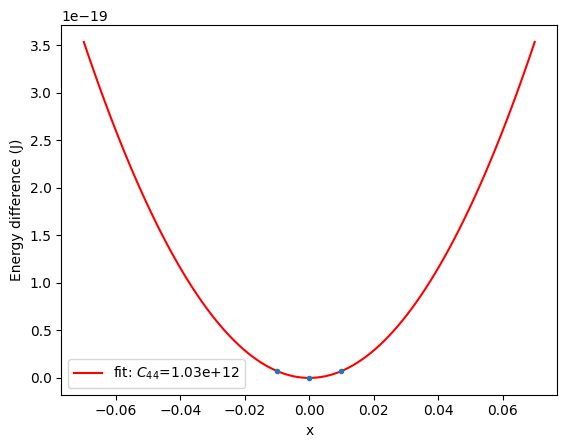

In [282]:
x = np.array([-0.01,0,0.01])
total_en2 = np.array([-562.8057286744,-562.8024215820,-562.8057286744])
# -562.8024215820 is the minimum
diff_en2 = np.abs(total_en2 - total_en2[1])*13.605698066*1.60218e-19

popt2, pcov2 = curve_fit(g, x, diff_en2)
plt.figure()
plt.plot(xdata,g(xdata,*popt2),'r-',label='fit: $C_{44}$=%.2e' % tuple(2*popt2/V_ini))
plt.plot(x,diff_en2,'.')
plt.xlabel('x')
plt.ylabel('Energy difference (J)')
plt.legend()
plt.savefig('c44.png',dpi=300)

print(2*popt2/V_ini)
print(V_ini)